# 3. Ajuste avanzado modelos de clasificacion multiclase algoritmos de Machine Learning
***


### Caso de estudio #2


### Tecnicas de ajuste de los datos y modelos:

| Ingeniería de datos       | Si / No       |
| :-------                  | :------:    |
| Escalado de datos         | Si          |
| Ajuste de hiperparametros | Si         |
| Sobremuestreo             | No          |
| Ajuste de pesos de clase  | Si          |



In [1]:
# librerias
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns

from numpy.random import seed
seed(0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from plot_metric.functions import BinaryClassification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from matplotlib import pyplot
from numpy import arange
from pprint import pprint
from sklearn.metrics import fbeta_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from xgboost import plot_tree
from time import time
from sklearn.model_selection import StratifiedKFold

In [2]:
# MULTICLASE funcion para generar matriz de confusion y medidas de desempeño del modelos clasificacion multiclase
def model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo, label_pred):
    print('\n')
    print("MATRIZ DE CONFUSION")
    print('\n')
    matriz = confusion_matrix(label_test2, label_pred)
    #print(matriz)
    classes = ["Funcional","Falla comp1","Falla comp2","Falla comp3","Falla comp4"]
    cm = ConfusionMatrix(modelo, classes=classes, label_encoder={0:"Funcional", 1:"Falla comp1", 2:"Falla comp2", 3:"Falla comp3", 4:"Falla comp4"})
    cm.fit(data_train, label_train2)
    cm.score(data_test, label_test2)
    cm.show()
    # Medidas de desempeño del modelo
    print('\n')
    print("MEDIDAS DE DESEMPEÑO DEL MODELO")
    print('\n')
    print('Exactitud - Accuracy: {}'.format(modelo.score(data_test, label_test2)))
    print('-'*60)
    print('Precisión por clase: {}'.format(metrics.precision_score(label_test2, label_pred, average=None)))
    print('Sensibilidad - Recall por clase: {}'.format(metrics.recall_score(label_test2, label_pred, average=None)))
    print('F1 por clase: {}'.format(metrics.f1_score(label_test2, label_pred, average=None)))
    print('-'*60)
    print('F1 Macro: {}'.format(metrics.f1_score(label_test2, label_pred, average='macro')))
    print('F1 Micro: {}'.format(metrics.f1_score(label_test2, label_pred, average='micro')))
    print('F1 Weighted: {}'.format(metrics.f1_score(label_test2, label_pred, average='weighted')))
    print('-'*60)
    print('Sensibilidad - Recall Macro: {}'.format(metrics.recall_score(label_test2, label_pred, average='macro')))
    print('Sensibilidad - Recall Micro: {}'.format(metrics.recall_score(label_test2, label_pred, average='micro')))
    print('Sensibilidad - Recall Weighted: {}'.format(metrics.recall_score(label_test2, label_pred, average='weighted')))
    print('-'*60)
    print('Precisión Macro: {}'.format(metrics.precision_score(label_test2, label_pred, average='macro')))
    print('Precisión Micro: {}'.format(metrics.precision_score(label_test2, label_pred, average='micro')))
    print('Precisión Weighted: {}'.format(metrics.precision_score(label_test2, label_pred, average='weighted')))
        
    print('-'*60)
   
    print(classification_report(label_test2, label_pred))
    

In [3]:
# cargar archivos
test = pd.read_excel (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\datos simulacion\test11.xlsx')
train = pd.read_excel (r'D:\alexh\Documents\Maestria en estadistica\proyecto de grado\datos simulacion\train11.xlsx')

In [4]:
train.head()

,datetime,id,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,0,0,0,0,0,0,0,0,0,3,18,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,0,0,0,0,0,0,0,0,0,3,18,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,0,0,0,0,0,0,0,0,0,3,18,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,0,0,0,0,0,0,0,0,0,3,18,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,0,0,0,0,0,0,0,0,0,3,18,0


In [5]:
test.head()

,datetime,id,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age,failure
0,2015-01-01 06:00:00,3,185.482043,461.211137,87.453199,28.216864,0,0,0,0,0,0,0,0,0,3,8,0
1,2015-01-01 07:00:00,3,179.818516,519.166185,109.318603,37.290722,0,0,0,0,0,0,0,0,0,3,8,0
2,2015-01-01 08:00:00,3,165.616803,467.107482,101.285580,34.530035,0,0,0,0,0,0,0,0,0,3,8,0
3,2015-01-01 09:00:00,3,165.007013,391.994872,98.825669,27.495507,0,0,0,0,0,0,0,0,0,3,8,0
4,2015-01-01 10:00:00,3,138.898164,488.764118,102.800017,44.698218,0,0,0,0,0,0,0,0,0,3,8,0


In [6]:
# tamaño base de entrenamiento y pruebas
print("numero de dimensiones train =", train.ndim)
print("tamaño de la tabla train=", train.shape)
print("total datos train =", train.size)
print("numero de dimensiones test =", test.ndim)
print("tamaño de la tabla test=", test.shape)
print("total datos test=", test.size)

numero de dimensiones train = 2
tamaño de la tabla train= (683388, 18)
total datos train = 12300984
numero de dimensiones test = 2
tamaño de la tabla test= (192752, 18)
total datos test= 3469536


In [7]:
variables=['volt','rotate','pressure','vibration','error1','error2','error3','error4','error5','mto_comp1','mto_comp2','mto_comp3','mto_comp4','model','age']

objetivo='failure'

In [8]:
# estandarizado de datos sin incluir id
scaler = StandardScaler()
train[variables]=scaler.fit_transform(train[variables])
test[variables]=scaler.transform(test[variables])
train.head()


,datetime,id,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age,failure
0,2015-01-01 06:00:00,1,0.350986,-0.534618,1.105902,0.879350,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
1,2015-01-01 07:00:00,1,-0.508982,-0.834013,-0.488294,0.567226,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
2,2015-01-01 08:00:00,1,0.013930,1.533590,-2.318235,-1.154994,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
3,2015-01-01 09:00:00,1,-0.535828,-1.909450,0.759382,0.139832,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0
4,2015-01-01 10:00:00,1,-0.848698,-0.214013,0.998102,-2.682002,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669,0


In [9]:
# separar base de entrenamiento en data_train y label_train
data_train=train.iloc[:,np.r_[2:17]]
data_train.head()


,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age
0,0.350986,-0.534618,1.105902,0.879350,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
1,-0.508982,-0.834013,-0.488294,0.567226,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
2,0.013930,1.533590,-2.318235,-1.154994,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
3,-0.535828,-1.909450,0.759382,0.139832,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669
4,-0.848698,-0.214013,0.998102,-2.682002,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,1.195669


In [10]:
# etiquetas
label_train2=train.iloc[:,17]
label_train2.head()

0    0
1    0
2    0
3    0
4    0
Name: failure, dtype: int64

In [11]:
# separar base de prueba en data_test y label_test
data_test=test.iloc[:,np.r_[2:17]]
label_test2=test.iloc[:,17]
data_test.head()

,volt,rotate,pressure,vibration,error1,error2,error3,error4,error5,mto_comp1,mto_comp2,mto_comp3,mto_comp4,model,age
0,0.948268,0.276871,-1.212875,-2.266819,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
1,0.583128,1.378091,0.765720,-0.574673,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
2,-0.332485,0.388909,0.038814,-1.089502,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
3,-0.371799,-1.038326,-0.183783,-2.401342,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085
4,-2.055090,0.800413,0.175855,0.806719,-0.033998,-0.033477,-0.030712,-0.028355,-0.01913,-0.028612,-0.029767,-0.028943,-0.029019,0.159826,-0.541085


## Ajuste avanzado modelos de clasificacion multiclase

## Ajuste avanzado Logistic Regression

#### Stratified k-fold cross-validation

Evaluaremos el modelo utilizando validación cruzada estratificada repetida de k veces, con 10 pliegues y 3 repeticiones. Informaremos la desviación media y estándar de la precisión del modelo en todas las repeticiones y pliegues

In [14]:
# evaluar con parametros por defecto

model = LogisticRegression()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('f1_score: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

f1_score: 0.548 (0.061)


### Ajuste de hiperparametros


### Ajustar C

In [26]:
def get_models():
    models = dict()
    for i in [ 0.01, 0.1, 1, 10, 100, 1000]:
        models[str(i)] = LogisticRegression(C=i)
    return models

# evaluar usando cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores


>0.01 0.360 (0.044)
>0.1 0.490 (0.054)
>1 0.541 (0.051)
>10 0.572 (0.052)
>100 0.581 (0.054)
>1000 0.581 (0.053)


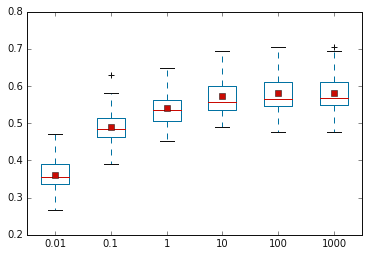

In [27]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

El mayor valor de F1 para un valor de C entre 100 y 1000

## Grid Search with Cross Validation

In [36]:

model = LogisticRegression()
parameters= {'C': [ 50, 100, 200],
            'penalty': ['l1', 'l2']                      
            } 

grid = GridSearchCV(estimator = model, param_grid=parameters, cv=2, verbose=2, scoring='f1_macro', n_jobs = -1)

%time grid.fit(data_train, label_train2)


Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  12 | elapsed:  1.3min remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:  3.0min remaining:   36.4s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  3.6min finished
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Wall time: 4min 36s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [50, 100, 200], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=2)

In [37]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'C': 200, 'penalty': 'l1'}
0.6088577642132935
4


In [38]:
modelo1= grid.best_estimator_
modelo1.fit(data_train, label_train2)

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=200, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
label_pred1 = modelo1.predict(data_test)



MATRIZ DE CONFUSION




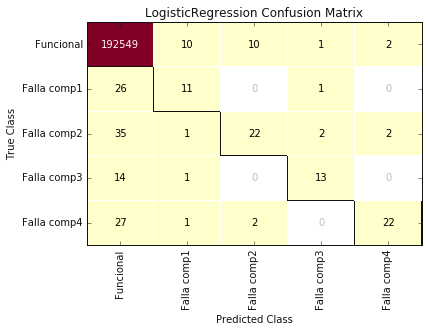



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.999299618162198
------------------------------------------------------------
Precisión por clase: [0.99947055 0.45833333 0.64705882 0.76470588 0.84615385]
Sensibilidad - Recall por clase: [0.99988056 0.28947368 0.35483871 0.46428571 0.42307692]
F1 por clase: [0.99967551 0.35483871 0.45833333 0.57777778 0.56410256]
------------------------------------------------------------
F1 Macro: 0.5909455795032498
F1 Micro: 0.999299618162198
F1 Weighted: 0.9991954660184942
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.5063111190806423
Sensibilidad - Recall Micro: 0.999299618162198
Sensibilidad - Recall Weighted: 0.999299618162198
------------------------------------------------------------
Precisión Macro: 0.7431444861104545
Precisión Micro: 0.999299618162198
Precisión Weighted: 0.9991750430883307
------------------------------------------------------------
              precision    recall  f

In [40]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo1, label_pred1)

Se obtiene un F1 macro de 59%

## Regresión logística ponderada 

Clasificacion binaria con base desequilibrada y ponderacion de pesos


## Grid Search Weighted Logistic Regression, con validacion cruzada estratificada

In [42]:
# definir el modelo
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=200)
# definir cuadricula
balance = [{0:1, 1:10, 2:10, 3:10, 4:10}, {0:1, 1:100, 2:100, 3:100, 4:100}, {0:1, 1:1, 2:1, 3:1, 4:1}]
param_grid = dict(class_weight=balance)

# definir procedimiento de evaluacion 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='f1_macro', verbose=2)

# ejecutar grid search
grid_result = grid.fit(data_train, label_train2)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  2.7min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  3.1min finished


In [43]:
# reportar la mejor configuracion
print('mejor: %f usando %s' % (grid_result.best_score_, grid_result.best_params_))
# reportar las mejores configuraciones
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

mejor: 0.735629 usando {'class_weight': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}}
0.695326 (0.021005) with: {'class_weight': {0: 1, 1: 10, 2: 10, 3: 10, 4: 10}}
0.601065 (0.029355) with: {'class_weight': {0: 1, 1: 100, 2: 100, 3: 100, 4: 100}}
0.735629 (0.007279) with: {'class_weight': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}}


In [16]:
# se asigna un peso de 10 a las clases minoritarias
weights = {0:1, 1:10, 2:10, 3:10, 4:10}

In [17]:
modelom6 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=200, class_weight=weights)
modelom6.fit(data_train, label_train2)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 10, 2: 10, 3: 10, 4: 10},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=200, multi_class='multinomial',
                   n_jobs=None, penalty='l2', random_state=None,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [18]:
label_predm6 = modelom6.predict(data_test)



MATRIZ DE CONFUSION




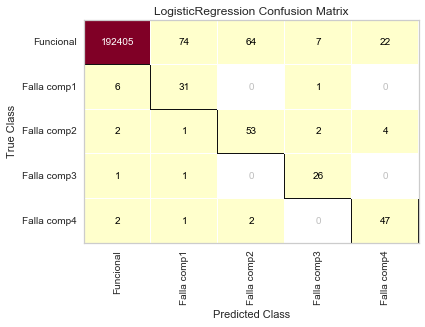



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9990142774134639
------------------------------------------------------------
Precisión por clase: [0.99994283 0.28703704 0.44537815 0.72222222 0.64383562]
Sensibilidad - Recall por clase: [0.99913279 0.81578947 0.85483871 0.92857143 0.90384615]
F1 por clase: [0.99953765 0.42465753 0.58563536 0.8125     0.752     ]
------------------------------------------------------------
F1 Macro: 0.7148661082578572
F1 Micro: 0.9990142774134639
F1 Weighted: 0.9991972291602932
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.9004357115340076
Sensibilidad - Recall Micro: 0.9990142774134639
Sensibilidad - Recall Weighted: 0.9990142774134639
------------------------------------------------------------
Precisión Macro: 0.6196831718310053
Precisión Micro: 0.9990142774134639
Precisión Weighted: 0.9994874948580834
------------------------------------------------------------
              precision    reca

In [19]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom6, label_predm6)

Con la asignacion de peso se evidencia una disminucion del numero de falsos negativos mejorando el recall macro en 20 puntos porcentuales

In [62]:
# se asigna un peso de 2 a las clases minoritarias
weights = {0:1, 1:2, 2:2, 3:2, 4:2}

In [63]:
modelom6 = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=200, class_weight=weights, C=100)
modelom6.fit(data_train, label_train2)

LogisticRegression(C=100, class_weight={0: 1, 1: 2, 2: 2, 3: 2, 4: 2},
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=200, multi_class='multinomial',
                   n_jobs=None, penalty='l2', random_state=None,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [64]:
label_predm6 = modelom6.predict(data_test)



MATRIZ DE CONFUSION




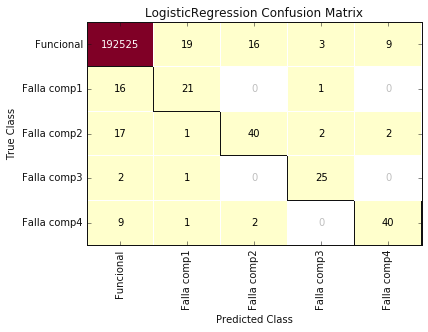



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9994760106250519
------------------------------------------------------------
Precisión por clase: [0.99977151 0.48837209 0.68965517 0.80645161 0.78431373]
Sensibilidad - Recall por clase: [0.99975594 0.55263158 0.64516129 0.89285714 0.76923077]
F1 por clase: [0.99976372 0.51851852 0.66666667 0.84745763 0.77669903]
------------------------------------------------------------
F1 Macro: 0.7618211128652665
F1 Micro: 0.9994760106250519
F1 Weighted: 0.99947940278542
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.7719273433600378
Sensibilidad - Recall Micro: 0.9994760106250519
Sensibilidad - Recall Weighted: 0.9994760106250519
------------------------------------------------------------
Precisión Macro: 0.7537128228604084
Precisión Micro: 0.9994760106250519
Precisión Weighted: 0.9994847318504748
------------------------------------------------------------
              precision    recall

In [65]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom6, label_predm6)

Con la asignacion de peso y ajuste de hiperprametros se evidencia una mejora del F1 score y recall macro

## Ajuste avanzado Bagging Classifier

### Ajuste de hiperparametros
tomado de https://machinelearningmastery.com/bagging-ensemble-with-python/

### Explorar el numero de arboles 

In [14]:
# funcion para evaluar lista de modelos
def get_models():
    models = dict()
    models['10'] = BaggingClassifier(n_estimators=10)
    models['50'] = BaggingClassifier(n_estimators=50)
    models['100'] = BaggingClassifier(n_estimators=100)
    models['500'] = BaggingClassifier(n_estimators=500)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>10 0.671 (0.033)
>50 0.688 (0.016)
>100 0.691 (0.023)
>500 0.694 (0.022)


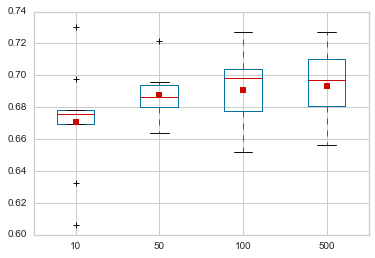

In [15]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

se observa que el F1 aumenta y se mantiene estable después de unos 100 árboles


### Ajustar el numero de muestras (max_samples)

In [20]:
def get_models():
    models = dict()
    for i in arange(0.1, 1.1, 0.2):
        key = '%.1f' % i
        models[key] = BaggingClassifier(max_samples=i)
    return models
 
# evaluar usando cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 


>0.1 0.653 (0.015)
>0.3 0.668 (0.025)
>0.5 0.684 (0.038)
>0.7 0.671 (0.028)
>0.9 0.665 (0.028)


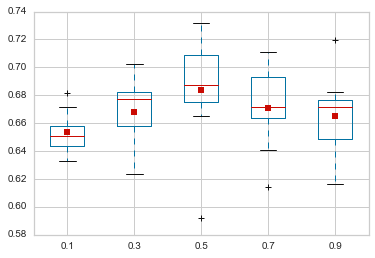

In [21]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# grafico de cajas y bigotes 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

Los resultados sugieren que se selecciones el numero de muestras en 0.5

## Entrenar modelo con hiperparametros ajustados 

In [22]:
modelo2b=BaggingClassifier(n_estimators=100, max_samples=0.5, random_state=0)
modelo2b.fit(data_train, label_train2)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.5, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)



MATRIZ DE CONFUSION




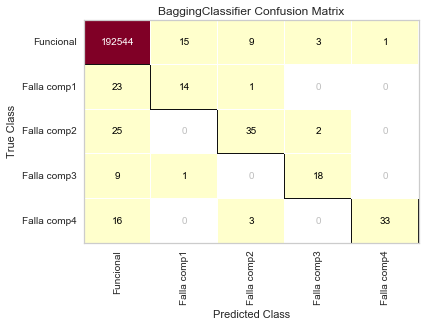



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9994396945297584
------------------------------------------------------------
Precisión por clase: [0.99962101 0.46666667 0.72916667 0.7826087  0.97058824]
Sensibilidad - Recall por clase: [0.9998546  0.36842105 0.56451613 0.64285714 0.63461538]
F1 por clase: [0.99973779 0.41176471 0.63636364 0.70588235 0.76744186]
------------------------------------------------------------
F1 Macro: 0.7042380693421395
F1 Micro: 0.9994396945297584
F1 Weighted: 0.9993996388447633
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6420528617948694
Sensibilidad - Recall Micro: 0.9994396945297584
Sensibilidad - Recall Weighted: 0.9994396945297584
------------------------------------------------------------
Precisión Macro: 0.789730254769567
Precisión Micro: 0.9994396945297584
Precisión Weighted: 0.9993895905253886
------------------------------------------------------------
              precision    recal

In [23]:
label_pred2b = modelo2b.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo2b, label_pred2b)

Obtenemos una mejora en el F1 macro de 3 puntos porcentuales en relacion con el modelo ajustado con hiperparametros por defecto

## Extra Trees Classifier hiperparametros por defecto

In [26]:
modelo1e=ExtraTreesClassifier()
modelo1e.fit(data_train, label_train2)

C:\Users\alexh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)



MATRIZ DE CONFUSION




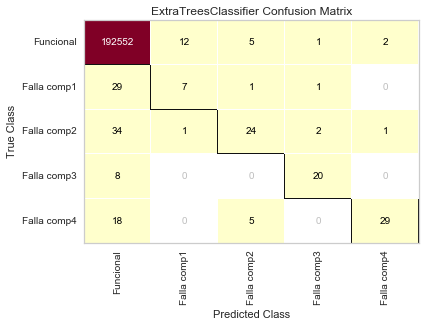



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9993774383663983
------------------------------------------------------------
Precisión por clase: [0.999538   0.35       0.68571429 0.83333333 0.90625   ]
Sensibilidad - Recall por clase: [0.99989614 0.18421053 0.38709677 0.71428571 0.55769231]
F1 por clase: [0.99971704 0.24137931 0.49484536 0.76923077 0.69047619]
------------------------------------------------------------
F1 Macro: 0.63912973410806
F1 Micro: 0.9993774383663983
F1 Weighted: 0.9992882346836303
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.5686362930457551
Sensibilidad - Recall Micro: 0.9993774383663983
Sensibilidad - Recall Weighted: 0.9993774383663983
------------------------------------------------------------
Precisión Macro: 0.7549671239569483
Precisión Micro: 0.9993774383663983
Precisión Weighted: 0.9992596937878556
------------------------------------------------------------
              precision    recall

In [27]:
label_pred1e = modelo1e.predict(data_test)
# metricas de desempeño:
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo1e, label_pred1e)

## Stratified k-fold cross-validation

Evaluaremos el modelo utilizando validación cruzada estratificada repetida de k veces, con 10 repeticiones y 20 pliegues. Informaremos la desviación media y estándar de la precisión del modelo en todas las repeticiones y pliegues

In [21]:
# evaluar extra trees algorithm para la clasifiacion binaria

model = ExtraTreesClassifier()

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, data_train, label_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.976 (0.004)


El resultado es una exactitud media de 0.976 con una desviacion estandar de 0.004

## Ajuste de hiperparametros
tomado de:
https://machinelearningmastery.com/extra-trees-ensemble-with-python/

### Explorar el numero de arboles

In [31]:
# funcion para evaluar lista de modelos
def get_models():
    models = dict()
    models['10'] = ExtraTreesClassifier(n_estimators=10)
    models['50'] = ExtraTreesClassifier(n_estimators=50)
    models['100'] = ExtraTreesClassifier(n_estimators=100)
    models['500'] = ExtraTreesClassifier(n_estimators=500)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>10 0.612 (0.032)
>50 0.644 (0.026)
>100 0.646 (0.029)
>500 0.648 (0.027)


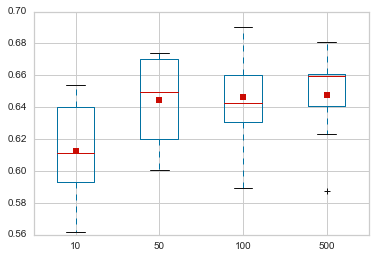

In [32]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

se observa que el f1 mejora con 500 arboles


### Ajustar el Number of Features (max_features)

>1 0.540 (0.026)
>2 0.588 (0.037)
>3 0.609 (0.026)
>4 0.612 (0.018)
>5 0.643 (0.028)
>6 0.660 (0.028)
>7 0.661 (0.028)
>8 0.675 (0.022)
>9 0.666 (0.017)
>10 0.677 (0.023)
>11 0.676 (0.017)


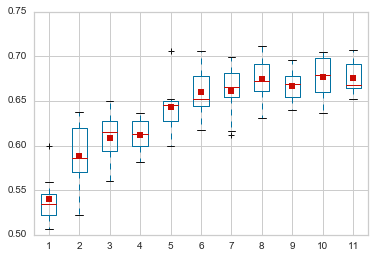

In [39]:
# lista de modelos a evaluar 
def get_models():
    models = dict()
    for i in range(1, 12):
        models[str(i)] = ExtraTreesClassifier(max_features=i)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

los resultados sugieren que un valor entre 8 y 11 sería apropiado

### Ajuste de Minimum Samples per Split

>2 0.601 (0.032)
>3 0.605 (0.030)
>4 0.617 (0.015)
>5 0.632 (0.032)
>6 0.622 (0.030)
>7 0.623 (0.027)
>8 0.631 (0.027)
>9 0.619 (0.026)
>10 0.616 (0.034)
>11 0.611 (0.035)
>12 0.614 (0.030)
>13 0.587 (0.024)
>14 0.599 (0.031)


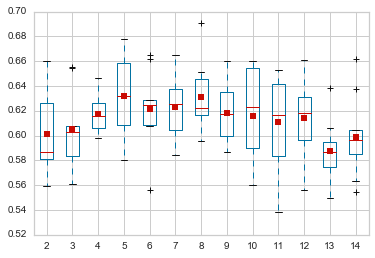

In [40]:
# evaluar entre 2 (default) y 14 muestras
def get_models():
    models = dict()
    for i in range(2, 15):
        models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


el valor con mejor F1 y menor varianza es 8

## Entrenar modelo con hiperparametros ajustados 

In [41]:
modelo2e=ExtraTreesClassifier(min_samples_split=8, n_estimators=500, random_state=0)
modelo2e.fit(data_train, label_train2)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=8,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)



MATRIZ DE CONFUSION




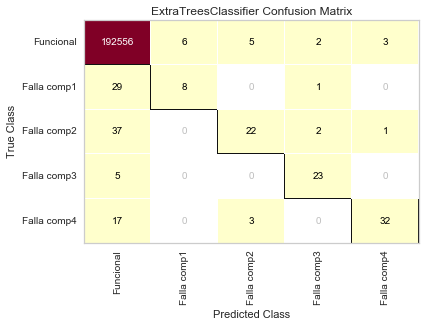



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9994241304889184
------------------------------------------------------------
Precisión por clase: [0.9995432  0.57142857 0.73333333 0.82142857 0.88888889]
Sensibilidad - Recall por clase: [0.99991691 0.21052632 0.35483871 0.82142857 0.61538462]
F1 por clase: [0.99973002 0.30769231 0.47826087 0.82142857 0.72727273]
------------------------------------------------------------
F1 Macro: 0.6668768995114192
F1 Micro: 0.9994241304889184
F1 Weighted: 0.9993264525537789
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6004190252946425
Sensibilidad - Recall Micro: 0.9994241304889184
Sensibilidad - Recall Weighted: 0.9994241304889184
------------------------------------------------------------
Precisión Macro: 0.8029245127866418
Precisión Micro: 0.9994241304889184
Precisión Weighted: 0.9993174445104885
------------------------------------------------------------
              precision    reca

In [42]:
label_pred2e = modelo2e.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo2e, label_pred2e)

Se obtiene una mejora de 3 puntos porcentuales en el F1 macro y Recall macro y 5 puntos porcentuales en la precision macro, comparado con el modelo entrenado con hiperparametros por defecto. 

## Ajuste de pesos de clase

In [43]:
modelo2e=ExtraTreesClassifier(min_samples_split=8, n_estimators=500, random_state=0, class_weight={0:1, 1:5, 2:5, 3:1, 4:2})
modelo2e.fit(data_train, label_train2)

ExtraTreesClassifier(bootstrap=False,
                     class_weight={0: 1, 1: 5, 2: 5, 3: 1, 4: 2},
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=8, min_weight_fraction_leaf=0.0,
                     n_estimators=500, n_jobs=None, oob_score=False,
                     random_state=0, verbose=0, warm_start=False)



MATRIZ DE CONFUSION




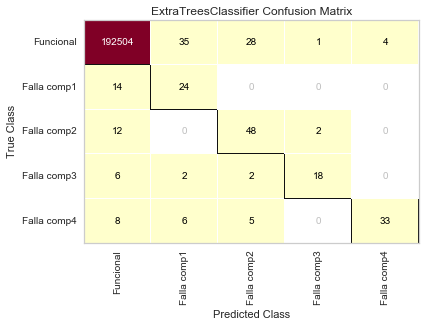



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9993514982983316
------------------------------------------------------------
Precisión por clase: [0.99979226 0.35820896 0.57831325 0.85714286 0.89189189]
Sensibilidad - Recall por clase: [0.99964689 0.63157895 0.77419355 0.64285714 0.63461538]
F1 por clase: [0.99971957 0.45714286 0.66206897 0.73469388 0.74157303]
------------------------------------------------------------
F1 Macro: 0.7190396597866322
F1 Micro: 0.9993514982983316
F1 Weighted: 0.9993958506509292
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.736578381709772
Sensibilidad - Recall Micro: 0.9993514982983316
Sensibilidad - Recall Weighted: 0.9993514982983316
------------------------------------------------------------
Precisión Macro: 0.7370698425094787
Precisión Micro: 0.9993514982983316
Precisión Weighted: 0.9994803681596632
------------------------------------------------------------
              precision    recal

In [44]:
label_pred2e = modelo2e.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo2e, label_pred2e)

La ponderacion de peso de clase mejora el F1 macro en 5 puntos porcentuales

## Ajuste avanzado Modelo Random Forest 

## Ajuste de hiperparametros
tomado de:
https://machinelearningmastery.com/extra-trees-ensemble-with-python/

### Explorar el numero de arboles

In [50]:
# funcion para evaluar lista de modelos
def get_models():
    models = dict()
    models['10'] = RandomForestClassifier(n_estimators=10)
    models['50'] = RandomForestClassifier(n_estimators=50)
    models['100'] = RandomForestClassifier(n_estimators=100)
    models['500'] = RandomForestClassifier(n_estimators=500)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>10 0.627 (0.023)
>50 0.672 (0.026)
>100 0.672 (0.026)
>500 0.679 (0.028)


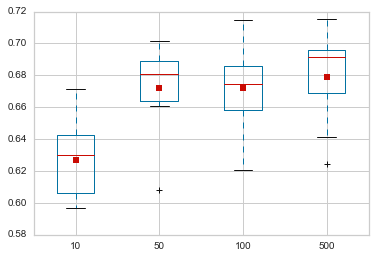

In [51]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

se observa que el f1 mejora con 500 arboles


### Ajustar profundidad (max_depth)

>2 0.200 (0.000)
>6 0.423 (0.086)
>8 0.552 (0.049)
>10 0.623 (0.018)
>15 0.631 (0.033)
>20 0.634 (0.018)
>25 0.622 (0.022)


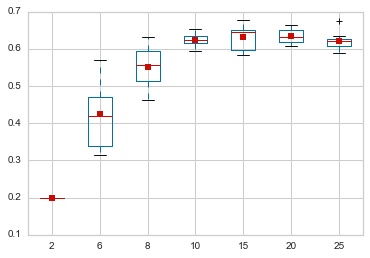

In [54]:
# lista de modelos a evaluar 
def get_models():
    models = dict()
    for i in [2, 6, 8, 10, 15, 20, 25]:
        models[str(i)] = RandomForestClassifier(max_depth =i)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


los resultados sugieren que un valor entre 10 y 15 sería apropiado

## Entrenar modelo con hiperparametros ajustados 

In [16]:
modelo2r=RandomForestClassifier(max_depth =20, n_estimators=500, random_state=0)
modelo2r.fit(data_train, label_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)



MATRIZ DE CONFUSION




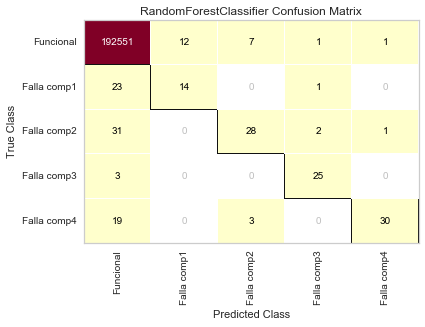



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9994604465842118
------------------------------------------------------------
Precisión por clase: [0.99960546 0.53846154 0.73684211 0.86206897 0.9375    ]
Sensibilidad - Recall por clase: [0.99989095 0.36842105 0.4516129  0.89285714 0.57692308]
F1 por clase: [0.99974818 0.4375     0.56       0.87719298 0.71428571]
------------------------------------------------------------
F1 Macro: 0.7177453757700647
F1 Micro: 0.9994604465842118
F1 Weighted: 0.9994010759195423
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6579410251032185
Sensibilidad - Recall Micro: 0.9994604465842118
Sensibilidad - Recall Weighted: 0.9994604465842118
------------------------------------------------------------
Precisión Macro: 0.8148956128688571
Precisión Micro: 0.9994604465842118
Precisión Weighted: 0.9993932897193892
------------------------------------------------------------
              precision    reca

In [17]:
label_pred2r = modelo2r.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo2r, label_pred2r)

Con el ajuste de hiperparametros se obtiene una mejora de 7 puntos porcentuales en el F1 macro

## Ajuste avanzado Decision tree classifier

### Hiperparametros por defecto

In [12]:
modelom5 = tree.DecisionTreeClassifier()
modelom5.fit(data_train, label_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [13]:
label_predm5 = modelom5.predict(data_test)



MATRIZ DE CONFUSION




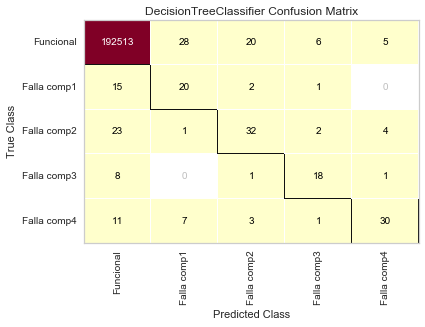



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9992788661077446
------------------------------------------------------------
Precisión por clase: [0.999704   0.35714286 0.55172414 0.64285714 0.75      ]
Sensibilidad - Recall por clase: [0.99969362 0.52631579 0.51612903 0.64285714 0.57692308]
F1 por clase: [0.99969881 0.42553191 0.53333333 0.64285714 0.65217391]
------------------------------------------------------------
F1 Macro: 0.6507190233027306
F1 Micro: 0.9992788661077446
F1 Weighted: 0.9992900183745086
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6523837325198292
Sensibilidad - Recall Micro: 0.9992788661077446
Sensibilidad - Recall Weighted: 0.9992788661077446
------------------------------------------------------------
Precisión Macro: 0.6602856283339869
Precisión Micro: 0.9992788661077446
Precisión Weighted: 0.999314029079494
------------------------------------------------------------
              precision    recal

In [14]:
# metricas de desempeño
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelom5, label_predm5)

## Ajuste de hiperparametros

### Ajustar profundidad (max_depth)

>2 0.340 (0.006)
>6 0.655 (0.022)
>8 0.646 (0.027)
>10 0.639 (0.023)
>15 0.629 (0.028)
>20 0.629 (0.023)
>25 0.627 (0.025)


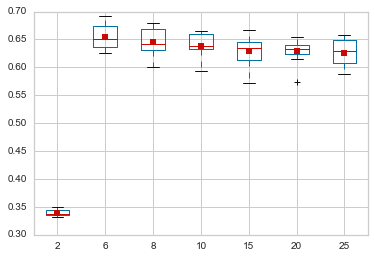

In [24]:
# lista de modelos a evaluar 
def get_models():
    models = dict()
    for i in [2, 6, 8, 10, 15, 20, 25]:
        models[str(i)] = tree.DecisionTreeClassifier(max_depth =i)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


>1 0.623 (0.022)
>5 0.665 (0.019)
>10 0.665 (0.022)
>20 0.643 (0.023)


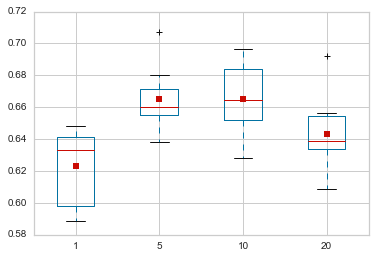

In [25]:
    
# lista de modelos a evaluar 
def get_models():
    models = dict()
    for i in [1, 5, 10, 20]:
        models[str(i)] = tree.DecisionTreeClassifier(min_samples_leaf =i)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


## Grid Search cross-validation

In [27]:
model = tree.DecisionTreeClassifier()

parameters= {'max_depth' : [6, 8],
             'min_samples_leaf' : [4, 5],
             'criterion': ['entropy', 'gini'],
}

grid = GridSearchCV(model, param_grid=parameters, cv=3, verbose=2, scoring='f1_macro', n_jobs=-1)
%time grid.fit(data_train, label_train2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  24 | elapsed:    9.1s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   11.4s finished


Wall time: 16.5 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [6, 8],
                         'min_samples_leaf': [4, 5]},
    

In [28]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4}
0.7217604270993341
0


los resultados sugieren que un valor entre 10 y 15 sería apropiado

## Entrenar modelo con hiperparametros ajustados 

In [29]:
modelo1d=tree.DecisionTreeClassifier(criterion='entropy', max_depth =6, min_samples_leaf=4 , random_state=0)
modelo1d.fit(data_train, label_train2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')



MATRIZ DE CONFUSION




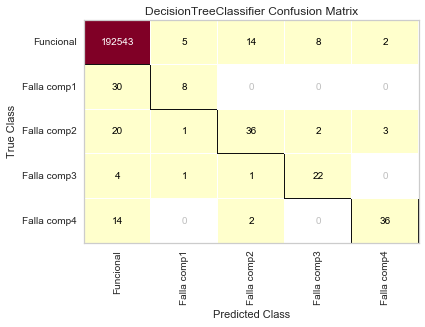



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9994448825433718
------------------------------------------------------------
Precisión por clase: [0.99964696 0.53333333 0.67924528 0.6875     0.87804878]
Sensibilidad - Recall por clase: [0.99984941 0.21052632 0.58064516 0.78571429 0.69230769]
F1 por clase: [0.99974817 0.30188679 0.62608696 0.73333333 0.77419355]
------------------------------------------------------------
F1 Macro: 0.6870497604686562
F1 Micro: 0.9994448825433718
F1 Weighted: 0.9993908514460024
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.6538085724153655
Sensibilidad - Recall Micro: 0.9994448825433718
Sensibilidad - Recall Weighted: 0.9994448825433718
------------------------------------------------------------
Precisión Macro: 0.7555548707319419
Precisión Micro: 0.9994448825433718
Precisión Weighted: 0.9993738180640576
------------------------------------------------------------
              precision    reca

In [30]:
label_pred1d = modelo1d.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo1d, label_pred1d)

## Ajuste de pesos de clase

In [33]:
modelo2d=tree.DecisionTreeClassifier(criterion='entropy', max_depth =6, min_samples_leaf=4 , random_state=0, class_weight={0:1, 1:5, 2:5, 3:1, 4:2})
modelo2d.fit(data_train, label_train2)

DecisionTreeClassifier(class_weight={0: 1, 1: 5, 2: 5, 3: 1, 4: 2},
                       criterion='entropy', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=0, splitter='best')



MATRIZ DE CONFUSION




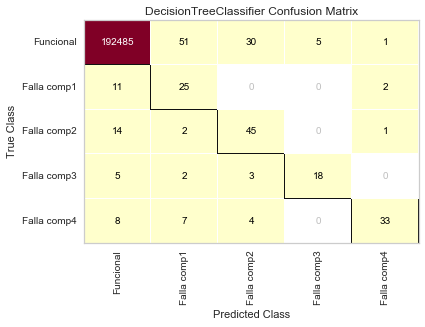



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9992425500124512
------------------------------------------------------------
Precisión por clase: [0.99980262 0.28735632 0.54878049 0.7826087  0.89189189]
Sensibilidad - Recall por clase: [0.99954822 0.65789474 0.72580645 0.64285714 0.63461538]
F1 por clase: [0.9996754  0.4        0.625      0.70588235 0.74157303]
------------------------------------------------------------
F1 Macro: 0.6944261582838587
F1 Micro: 0.9992425500124512
F1 Weighted: 0.999324357469972
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.7321443873705393
Sensibilidad - Recall Micro: 0.9992425500124512
Sensibilidad - Recall Weighted: 0.9992425500124512
------------------------------------------------------------
Precisión Macro: 0.7020880036347139
Precisión Micro: 0.9992425500124512
Precisión Weighted: 0.9994564294054471
------------------------------------------------------------
              precision    recal

In [34]:
label_pred2d = modelo2d.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, modelo2d, label_pred2d)

Con el ajuste de Hiperparametros y ponderacion de pesos de clase se obtiene una mejora de 4 puntos porcentuales en el F1 macro.

# Ajuste avanzado modelo de clasificacion multiclase XGBoost

Codigos Tomados del libro XGBoost With Python, Jason Brownlee, 2020.

## XGBoost Model hiperparametros por defecto

In [12]:
model = XGBClassifier()
model.fit(data_train, label_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)



MATRIZ DE CONFUSION




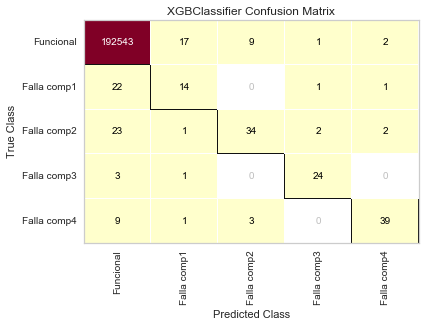



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9994915746658919
------------------------------------------------------------
Precisión por clase: [0.99970405 0.41176471 0.73913043 0.85714286 0.88636364]
Sensibilidad - Recall por clase: [0.99984941 0.36842105 0.5483871  0.85714286 0.75      ]
F1 por clase: [0.99977672 0.38888889 0.62962963 0.85714286 0.8125    ]
------------------------------------------------------------
F1 Macro: 0.7375876197575335
F1 Micro: 0.9994915746658919
F1 Weighted: 0.9994659870750553
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.7047600827047366
Sensibilidad - Recall Micro: 0.9994915746658919
Sensibilidad - Recall Weighted: 0.9994915746658919
------------------------------------------------------------
Precisión Macro: 0.7788211368031384
Precisión Micro: 0.9994915746658919
Precisión Weighted: 0.9994530398723506
------------------------------------------------------------
              precision    reca

In [13]:
label_predXGB = model.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, model, label_predXGB)

### Feature Importance

In [16]:
model = XGBClassifier()
model.fit(data_train, label_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[0.01420537 0.01702056 0.01550051 0.01542198 0.         0.
 0.         0.         0.         0.33055297 0.3018753  0.0779065
 0.1617613  0.04161585 0.02413971]


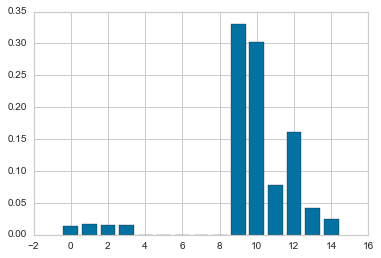

In [17]:
# feature importance
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

## Ajuste de hiperparametros XGBoost Extreme Gradient Boosting Algorithm

### Explorar el numero de arboles 

In [18]:
# funcion para evaluar lista de modelos
def get_models():
    models = dict()
    models['100'] = XGBClassifier(nthread=-1, n_estimators=100)
    models['400'] = XGBClassifier(nthread=-1, n_estimators=400)
    models['600'] = XGBClassifier(nthread=-1, n_estimators=600)
    return models

# funcion para evaluar modelo usando CV
def evaluate_model(model):
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=kfold, n_jobs=-1, error_score='raise')
    return scores

>100 0.694 (0.001437)
>400 0.697 (0.004384)
>600 0.696 (0.004645)


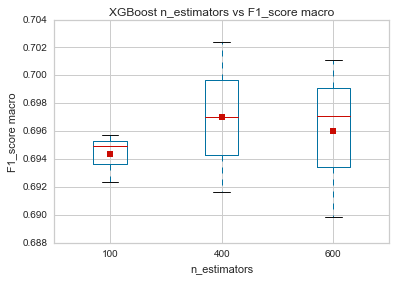

In [19]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.6f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title("XGBoost n_estimators vs F1_score macro")
pyplot.xlabel('n_estimators')
pyplot.ylabel('F1_score macro')
pyplot.show()

## Ajustar la profundidad del árbol (Tree Depth)

In [20]:
# lista de modelos a evaluar
def get_models():
    models = dict()
    for i in [4, 6, 8, 10]:
        models[str(i)] = XGBClassifier(nthread=-1, max_depth=i)
    return models

# evaluar usando cross-validation
def evaluate_model(model):
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=kfold, n_jobs=-1, error_score='raise')
    return scores


>4 0.696 (0.008665)
>6 0.694 (0.001437)
>8 0.706 (0.004411)
>10 0.708 (0.010997)


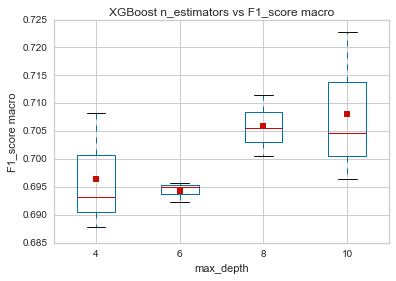

In [21]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.6f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title("XGBoost n_estimators vs F1_score macro")
pyplot.xlabel('max_depth')
pyplot.ylabel('F1_score macro')
pyplot.show()

##  Ajustar la tasa de aprendizaje (Learning Rate)

Podemos utilizar la capacidad de búsqueda de la cuadrícula en scikit-learn para evaluar el efecto sobre la pérdida logarítmica de
entrenar un modelo de aumento de gradiente con diferentes valores de tasa de aprendizaje. Retendremos el número
de árboles constantes en el valor predeterminado de 100.

In [12]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in [0.01, 0.1, 0.5, 1.0]:
        key = '%.4f' % i
        models[key] = XGBClassifier(nthread=-1, learning_rate=i)
    return models

# evaluar usando cross-validation
def evaluate_model(model):
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=kfold, n_jobs=-1, error_score='raise')
    return scores


>0.0100 0.719 (0.008214)
>0.1000 0.709 (0.004011)
>0.5000 0.688 (0.007570)
>1.0000 0.688 (0.003677)


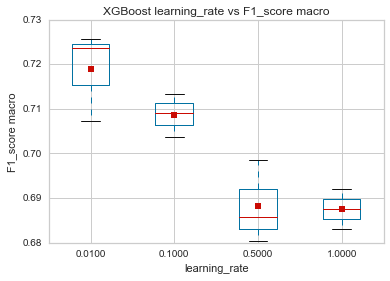

In [13]:
# modelos a evaluar
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.6f)' % (name, mean(scores), std(scores)))
# graficar el desempeño del modelo para comparacion 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title("XGBoost learning_rate vs F1_score macro")
pyplot.xlabel('learning_rate')
pyplot.ylabel('F1_score macro')
pyplot.show()

## Ajuste del muestreo de filas 

### Ajustar el numero de muestras (subsample)

In [12]:
def get_models():
    models = dict()
    for i in [0.3, 0.5, 0.8, 1.0]:
        key = '%.1f' % i
        models[key] = XGBClassifier(nthread=-1, subsample=i)
    return models
 
# evaluar usando cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)
    scores = cross_val_score(model, data_train, label_train2, scoring='f1_macro', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 

>0.3 0.699 (0.021)
>0.5 0.700 (0.016)
>0.8 0.700 (0.026)
>1.0 0.702 (0.026)


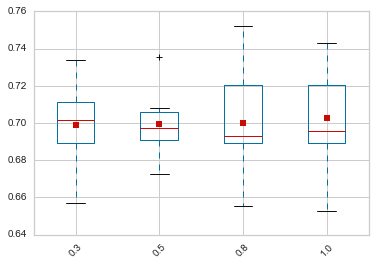

In [13]:
# modelos a evaluar
results, names = list(), list()
models = get_models()
# evaluar modelos y guardar resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# grafico de cajas y bigotes 
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()


## Evaluacion de desempeño del modelo ajustado y entrenado

## XGBoost Classifier

In [15]:
model2 = XGBClassifier(nthread=-1, max_depth=8, n_estimators=600, learning_rate=0.001, subsample=0.3)
model2.fit(data_train, label_train2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.001, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=-1, nthread=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)



MATRIZ DE CONFUSION




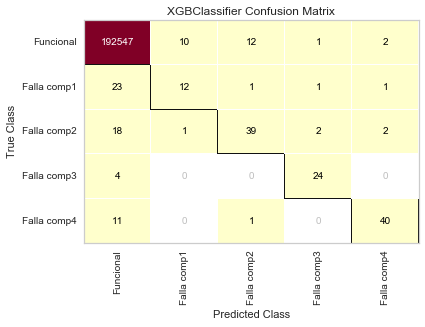



MEDIDAS DE DESEMPEÑO DEL MODELO


Exactitud - Accuracy: 0.9995330787747987
------------------------------------------------------------
Precisión por clase: [0.99970925 0.52173913 0.73584906 0.85714286 0.88888889]
Sensibilidad - Recall por clase: [0.99987018 0.31578947 0.62903226 0.85714286 0.76923077]
F1 por clase: [0.99978971 0.39344262 0.67826087 0.85714286 0.82474227]
------------------------------------------------------------
F1 Macro: 0.7506756647355868
F1 Micro: 0.9995330787747987
F1 Weighted: 0.9994988007962597
------------------------------------------------------------
Sensibilidad - Recall Macro: 0.7142131073098247
Sensibilidad - Recall Micro: 0.9995330787747987
Sensibilidad - Recall Weighted: 0.9995330787747987
------------------------------------------------------------
Precisión Macro: 0.8006658359102812
Precisión Micro: 0.9995330787747987
Precisión Weighted: 0.9994795382877856
------------------------------------------------------------
              precision    reca

In [16]:
label_predXGB2 = model2.predict(data_test)
# métricas de desempeño - evaluación del modelo
model_evaluation_multi(data_train, label_train2, data_test, label_test2, model2, label_predXGB2)

Se obtiene una mejora en el Recall y precision macro con el ajuste de hiperparametros